# 순환신경망(RNN) 기초

RNN의 API의 사용법과, input shape, output shape 등의 기본적인 것들에 대해서 알아봅니다.

In [1]:
## 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

2.3.0
2.4.0


## 단순 데이터 준비

In [2]:
# 'hello'의 각 문자를 원핫인코딩한다.
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# 1. 일대일 RNN의 구현

![image](https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png)

##  문제1: 은닉층 유닛을 2로 해서 위의 그래프를 구현해보라. 


In [3]:
### 힌트: SimpleRNN을 사용하고, units= hidden_size, return_sequences=True, return_state=True)로 설정해보라.

x_data = np.array([[h]], dtype=np.float32)
hidden_size = 2

###################################

                                              #타임스텝마다 출력 (만약 False이면 마지막스텝에서만 출력)
                                              #배치끝의 state가 다음 배치의 초기값이 된다.(연결된다.)
##################################

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[ 0.6257889 -0.7274273]]], shape: (1, 1, 2)
states: [[ 0.6257889 -0.7274273]], shape: (1, 2)


## 2. 위의 RNN을 n 시퀀스로 펼쳐보자.

![image](https://cloud.githubusercontent.com/assets/901975/23383634/649efd0a-fd82-11e6-925d-8041242743b0.png)

# 문제2: 위의 그래프를 구현해보라.

In [4]:
# 여전히 One cell RNN을 사용한다. 단 sequence가 5가 된다. 
# input_dim (4) -> output_dim (2) 

x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2

###################################

                                          ,  #타임스텝마다 출력 (만약 False이면 마지막스텝에서만 출력)
                                            #배치끝의 state가 다음 배치의 초기값이 된다.(연결된다.)

##################################


outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[-0.2097184   0.24345548]
  [ 0.5169038  -0.5665519 ]
  [ 0.8769983   0.23713498]
  [ 0.92523515 -0.53646564]
  [ 0.5688113  -0.47777387]]], shape: (1, 5, 2) 

states: [[ 0.5688113  -0.47777387]], shape: (1, 2)


# 3.배치로 입력을 넣어보자.

![image](https://cloud.githubusercontent.com/assets/901975/23383681/9943a9fc-fd82-11e6-8121-bd187994e249.png)

# 문제3: 위의 그래프를 구현해보라.

In [5]:
# 여전히 One cell RNN을 사용한다. 이번에는 배치가 3이다. 
# input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 배치는 다음으로 하자 (임의)
# 'hello', 'eolll', 'lleel'

x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2

###################################

                                               #타임스텝마다 출력 (만약 False이면 마지막스텝에서만 출력)
                                                #배치끝의 state가 다음 배치의 초기값이 된다.(연결된다.)

##################################


outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[-0.2170225  -0.64617944]
  [ 0.13833879  0.25395793]
  [ 0.09835469 -0.45742628]
  [ 0.63252413 -0.6598844 ]
  [ 0.86949605  0.0510057 ]]

 [[-0.36445814  0.6036662 ]
  [-0.20741378 -0.3901371 ]
  [ 0.5158639  -0.7826869 ]
  [ 0.83411795 -0.48063093]
  [ 0.7769072  -0.11630232]]

 [[ 0.2766424  -0.61443895]
  [ 0.7430021  -0.59442323]
  [ 0.41680375  0.8247635 ]
  [-0.75989157  0.8830771 ]
  [-0.6731401  -0.79989284]]], shape: (3, 5, 2) 

states: [[ 0.86949605  0.0510057 ]
 [ 0.7769072  -0.11630232]
 [-0.6731401  -0.79989284]], shape: (3, 2)


# 4. No return sequences

### 문제4: return_sequences=False로 놓고 결과를 확인하라.

In [6]:
# return_sequences=False로 놓고 결과를 확인하라.

###################################




##################################


outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.6756506   0.28895774]
 [ 0.01089792 -0.3870209 ]
 [-0.73398936 -0.6838648 ]], shape: (3, 2) 

states: [[ 0.6756506   0.28895774]
 [ 0.01089792 -0.3870209 ]
 [-0.73398936 -0.6838648 ]], shape: (3, 2)


# 5. No return state
### 문제5: return_state=False도 추가하고 결과를 살펴보자.

In [7]:
# return_state=False도 추가하고 결과를 살펴보자.
###################################




##################################

outputs= rnn(x_data)  # state가 안 나온다.

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.8772149   0.30095142]
 [-0.26860473 -0.9272253 ]
 [-0.23153694 -0.8045113 ]], shape: (3, 2) 



# 6. LSTM을 사용해보자.

### 문제6: LSTM을 구축해보라. LSTM의 출력은 outputs(출력), h_states(은닉상태), 그리고 c_states(셀상태)가 나온다.

In [8]:
###################################




##################################

outputs, h_states, c_states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('hidden_states: {}, shape: {}'.format(h_states, h_states.shape))
print('cell_states: {}, shape: {}'.format(c_states, c_states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.06109415 -0.08661051]
 [ 0.26523858 -0.13080338]
 [ 0.26747844 -0.09771931]], shape: (3, 2) 

hidden_states: [[ 0.06109415 -0.08661051]
 [ 0.26523858 -0.13080338]
 [ 0.26747844 -0.09771931]], shape: (3, 2)
cell_states: [[ 0.10253483 -0.24091496]
 [ 0.590971   -0.3627542 ]
 [ 0.5913715  -0.26333365]], shape: (3, 2)


## 7. GRU와 비교해보자


### 문제7: GRU를 구축하라 GRU의 출력은 outputs(출력)과 state(은닉상태)이다. (굳이 cell state를 사용하지 않는다.)

In [9]:
###################################




##################################

outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[0.22373572 0.23668118]
 [0.28993392 0.02246661]
 [0.162048   0.19362955]], shape: (3, 2) 

states: [[0.22373572 0.23668118]
 [0.28993392 0.02246661]
 [0.162048   0.19362955]], shape: (3, 2)


# 8.RNN을 적층으로 쌓아보자 (Stacked RNN)

#### 문제8. LSTM을 3개층을 쌓아보라

In [15]:
###################################




##################################

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 2)              56        
_________________________________________________________________
lstm_8 (LSTM)                (None, 5, 2)              40        
_________________________________________________________________
lstm_9 (LSTM)                (None, 5, 2)              40        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


# [실습1] RNN을 이용하여 MNIST Classification 학습하기 
  

MNIST Image를 한 line씩 RNN에 입력하여 classification을 하는 실습을 해보겠습니다.

In [16]:
## 하이퍼 파라미터
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

In [17]:
## Data 준비
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [18]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

n_train = train_images.shape[0]
n_test = test_images.shape[0]
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [19]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size).repeat()

### 문제9: LSTM 모델을 구축해보라. (LSTM -> Dense를 쌓고 softmax를 사용해보라.)

In [24]:
## Model 만들기 (아리 서머리 참조)
def create_model():
    
    ###################################

    
    
    ##################################

    return model

In [25]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [26]:
## 모델 컴파일
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
## 적합화를 위한 준비
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

In [28]:
## 모델 적합화
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/15
600/600 [==============================] - 34s 57ms/step - loss: 0.4771 - accuracy: 0.8441 - val_loss: 0.1715 - val_accuracy: 0.9471
Epoch 2/15
600/600 [==============================] - 29s 48ms/step - loss: 0.1407 - accuracy: 0.9565 - val_loss: 0.1020 - val_accuracy: 0.9680
Epoch 3/15
600/600 [==============================] - 30s 50ms/step - loss: 0.0967 - accuracy: 0.9705 - val_loss: 0.0763 - val_accuracy: 0.9752
Epoch 4/15
600/600 [==============================] - 29s 48ms/step - loss: 0.0709 - accuracy: 0.9787 - val_loss: 0.0767 - val_accuracy: 0.9771
Epoch 5/15
600/600 [==============================] - 28s 47ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 0.0643 - val_accuracy: 0.9794
Epoch 6/15
600/600 [==============================] - 28s 47ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0556 - val_accuracy: 0.9814
Epoch 7/15
600/600 [==============================] - 29s 48ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0536 - val_accuracy:

In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

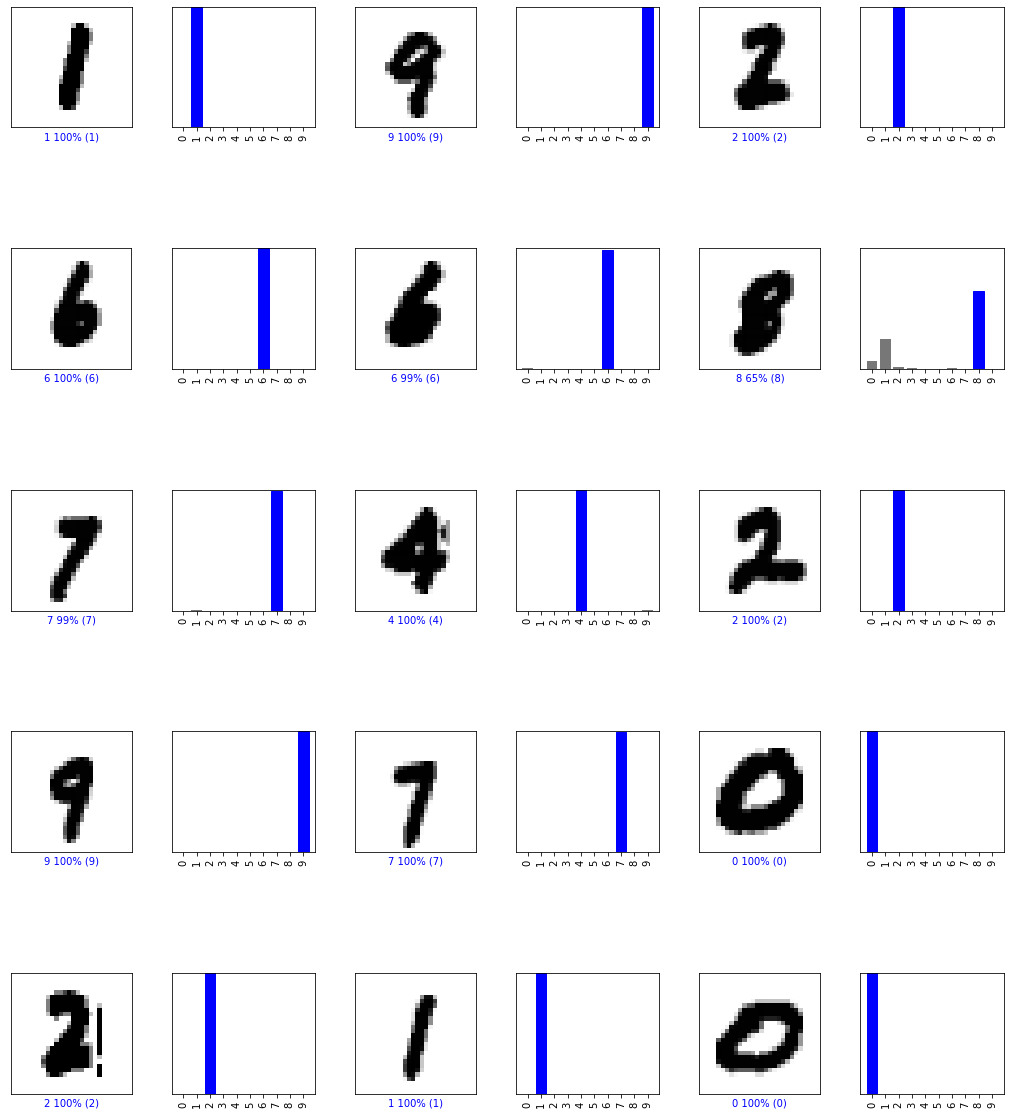

In [30]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# [실습2] Stock Prediction with RNN  
### RNN을 이용한 간단한 주식 예측 모델을 학습해보겠습니다.

In [31]:
## 하이퍼 파라미터
seq_length = 7
data_dim = 5
hidden_size = 10
output_dim = 1
learning_rate = 0.001
training_epochs = 500
batch_size = 25

In [32]:
## 데이터 전처리
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [33]:
# ## Google Drive 동기화
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
## 데이타 로딩
# 시가, 고가, 저가, 거래량, 종가의 순으로 데이터가 저장돼있다.
xy = np.loadtxt('data_in/data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # 데이터를 보면 날짜 순서가 거꾸로 돼있어 바로 잡는다.
xy = MinMaxScaler(xy).astype(np.float32) # 정규화하고,
x = xy           # 일단 모든 데이터를 다 사용하는데.
y = xy[:, [-1]]  # 종가를 레이블로 만든다.

In [37]:
# 데이터 구축  (LSTM에서가장 중요한 부분 중 하나)
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # 다음날의 종가
    dataX.append(_x)
    dataY.append(_y)

In [39]:
print(np.array(dataX).shape)  #(배치크기, 타임스텝크기 특성수) 여기서 타임스텝은 7이고, 특성수는 시/고저/거래량/종가의 5개다.
print(np.array(dataY).shape)

(725, 7, 5)
(725, 1)


In [40]:
## 훈련/테스트셋 분리
train_size = int(len(dataY) * 0.7 + 18)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(525, 7, 5) (525, 1)
(200, 7, 5) (200, 1)


In [41]:
## 데이터셋을 만들자
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((testX, testY)).prefetch(
                buffer_size=batch_size).batch(batch_size)

# 문제10: 2층 LSTM 모델을 만들어보자  2층 LSTM -> Dense로 구축해보자.

In [47]:
## 모델을 만들자.
## 상기: hidden_size = 10, output_dim = 1
## trainX.shape = (525, 7, 5)

def create_model():
    
    ###################################

    
    
    
    ##################################
    
    return model

In [48]:
model = create_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 7, 10)             640       
_________________________________________________________________
lstm_15 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [50]:
## 손실함수와 최적화 정의
def rmse_opt(learning_rate):
    return keras.optimizers.RMSprop(learning_rate)

model.compile(optimizer=rmse_opt(learning_rate),
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])  

In [51]:
## 적합화
model.fit(train_dataset, epochs=training_epochs,
          steps_per_epoch=trainX.shape[0]//batch_size,
          validation_data=test_dataset,
          validation_steps=testX.shape[0]//batch_size)

Epoch 1/500
21/21 [==============================] - 2s 96ms/step - loss: 0.0821 - root_mean_squared_error: 0.2866 - val_loss: 0.1658 - val_root_mean_squared_error: 0.4072
Epoch 2/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0197 - root_mean_squared_error: 0.1402 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2112
Epoch 3/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0073 - root_mean_squared_error: 0.0857 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0973
Epoch 4/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0986
Epoch 5/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0601
Epoch 6/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0047 - val_

21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0429
Epoch 96/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - root_mean_squared_error: 0.0351 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 97/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 98/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 99/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0617
Epoch 100/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0010 - val_root_m

21/21 [==============================] - 0s 11ms/step - loss: 9.6087e-04 - root_mean_squared_error: 0.0310 - val_loss: 9.1091e-04 - val_root_mean_squared_error: 0.0302
Epoch 187/500
21/21 [==============================] - 0s 11ms/step - loss: 9.7134e-04 - root_mean_squared_error: 0.0312 - val_loss: 8.4553e-04 - val_root_mean_squared_error: 0.0291
Epoch 188/500
21/21 [==============================] - 0s 10ms/step - loss: 9.0523e-04 - root_mean_squared_error: 0.0301 - val_loss: 9.3098e-04 - val_root_mean_squared_error: 0.0305
Epoch 189/500
21/21 [==============================] - 0s 11ms/step - loss: 9.2220e-04 - root_mean_squared_error: 0.0304 - val_loss: 8.3934e-04 - val_root_mean_squared_error: 0.0290
Epoch 190/500
21/21 [==============================] - 0s 12ms/step - loss: 9.0149e-04 - root_mean_squared_error: 0.0300 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 191/500
21/21 [==============================] - 0s 12ms/step - loss: 9.2856e-04 - root_mean_squared_e

21/21 [==============================] - 0s 10ms/step - loss: 8.6959e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0384
Epoch 277/500
21/21 [==============================] - 0s 10ms/step - loss: 8.8065e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0505
Epoch 278/500
21/21 [==============================] - 0s 10ms/step - loss: 9.1601e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 279/500
21/21 [==============================] - 0s 10ms/step - loss: 8.6559e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 280/500
21/21 [==============================] - 0s 10ms/step - loss: 8.6234e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 281/500
21/21 [==============================] - 0s 10ms/step - loss: 8.7524e-04 - root_mean_squared_error: 0.0296 - v

Epoch 322/500
21/21 [==============================] - 0s 9ms/step - loss: 8.6678e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 323/500
21/21 [==============================] - 0s 9ms/step - loss: 8.4282e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 324/500
21/21 [==============================] - 0s 10ms/step - loss: 8.7970e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0433
Epoch 325/500
21/21 [==============================] - 0s 9ms/step - loss: 8.7932e-04 - root_mean_squared_error: 0.0297 - val_loss: 8.8054e-04 - val_root_mean_squared_error: 0.0297
Epoch 326/500
21/21 [==============================] - 0s 10ms/step - loss: 8.7275e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 327/500
21/21 [==============================] - 0s 10ms/step - loss: 8.7838e-04 - root_mean_squared_er

Epoch 368/500
21/21 [==============================] - 0s 10ms/step - loss: 8.4331e-04 - root_mean_squared_error: 0.0290 - val_loss: 9.0292e-04 - val_root_mean_squared_error: 0.0300
Epoch 369/500
21/21 [==============================] - 0s 11ms/step - loss: 8.3987e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0446
Epoch 370/500
21/21 [==============================] - 0s 10ms/step - loss: 8.4643e-04 - root_mean_squared_error: 0.0291 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 371/500
21/21 [==============================] - 0s 10ms/step - loss: 8.6480e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 372/500
21/21 [==============================] - 0s 10ms/step - loss: 8.3410e-04 - root_mean_squared_error: 0.0289 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0492
Epoch 373/500
21/21 [==============================] - 0s 10ms/step - loss: 8.1729e-04 - root_mean_squared

Epoch 459/500
21/21 [==============================] - 0s 10ms/step - loss: 8.1579e-04 - root_mean_squared_error: 0.0286 - val_loss: 7.7498e-04 - val_root_mean_squared_error: 0.0278
Epoch 460/500
21/21 [==============================] - 0s 10ms/step - loss: 8.4056e-04 - root_mean_squared_error: 0.0290 - val_loss: 8.5365e-04 - val_root_mean_squared_error: 0.0292
Epoch 461/500
21/21 [==============================] - 0s 11ms/step - loss: 8.0001e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 462/500
21/21 [==============================] - 0s 10ms/step - loss: 8.4397e-04 - root_mean_squared_error: 0.0291 - val_loss: 9.8332e-04 - val_root_mean_squared_error: 0.0314
Epoch 463/500
21/21 [==============================] - 0s 10ms/step - loss: 7.9836e-04 - root_mean_squared_error: 0.0283 - val_loss: 7.6241e-04 - val_root_mean_squared_error: 0.0276
Epoch 464/500
21/21 [==============================] - 0s 11ms/step - loss: 7.7838e-04 - root_

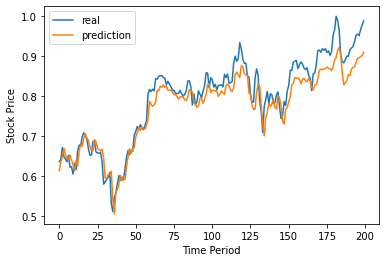

In [52]:
## 결과 확인
prediction = model.predict(test_dataset)

plt.plot(testY)
plt.plot(prediction)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['real', 'prediction'])
plt.show()